In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load historical dataset
df_apple = pd.read_csv('AAPL.csv')

In [ ]:
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
2,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
3,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
4,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097592,48630400


In [ ]:
df_apple.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10846,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500
10847,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
10848,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
10849,2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700
10850,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900


**EDA**

**WRT Datetime Data**

In [ ]:
# 'Date' column is not in datetime format
df_apple['Date'] = pd.to_datetime(df_apple['Date'])

# Set 'Date' as the index
df_apple.set_index('Date', inplace=True)

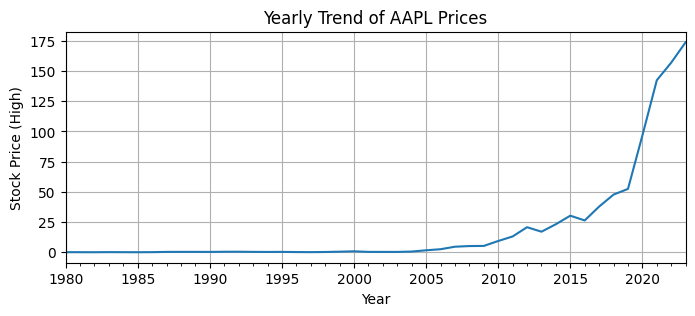

In [ ]:
# Resample the data by year and plot the high prices
df_apple.resample('Y').mean()['High'].plot(figsize=(8, 3))
# Customize the plot
plt.title('Yearly Trend of AAPL Prices')
plt.xlabel('Year')
plt.ylabel('Stock Price (High)')
plt.grid(True)
plt.show()

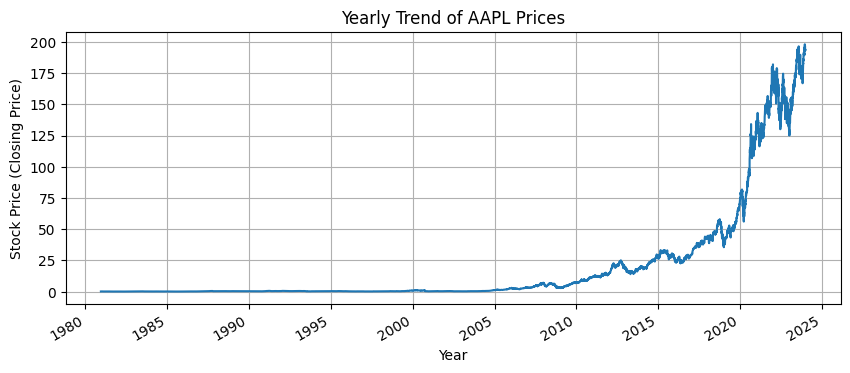

In [ ]:
df_apple['Close'].plot(figsize=(10,4))
plt.title('Yearly Trend of AAPL Prices')
plt.xlabel('Year')
plt.ylabel('Stock Price (Closing Price)')
plt.grid(True)

Text(0, 0.5, 'Stock Price (Closing Price)')

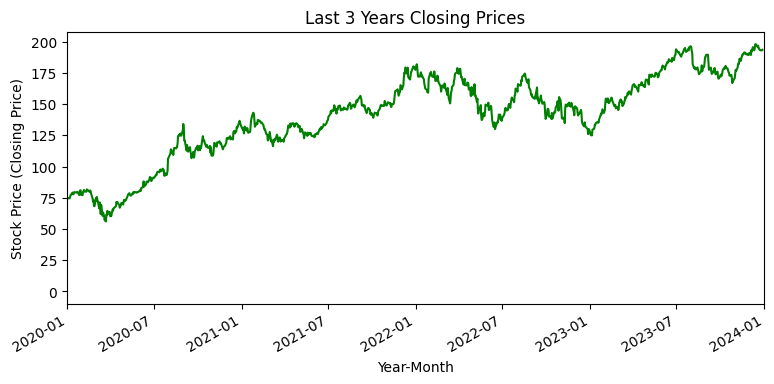

In [ ]:
df_apple['Close'].plot(xlim=['2020-01-01','2024-01-01'],figsize=(9,4), c='green')
plt.title('Last 3 Years Closing Prices')
plt.xlabel('Year-Month')
plt.ylabel('Stock Price (Closing Price)')

In [ ]:
df_apple.index

DatetimeIndex(['1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
               '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24',
               '1980-12-26', '1980-12-29',
               ...
               '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', name='Date', length=10851, freq=None)

Text(0, 0.5, 'Stock Price (Opening/Close Price)')

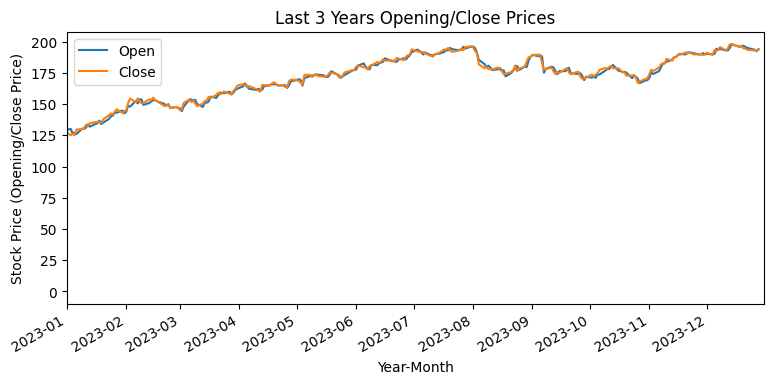

In [ ]:
df_apple[['Open','Close']].plot(xlim=['2023-01-01','2023-12-31'],figsize=(9,4))
plt.title('Last 3 Years Opening/Close Prices')
plt.xlabel('Year-Month')
plt.ylabel('Stock Price (Opening/Close Price)')

In [ ]:
print(type(df_apple.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
print(df_apple.index.isnull().sum())


0


**WRT Time Resampling rules**

In [ ]:
df_apple.resample(rule='A').min()

**Year End Frequency**

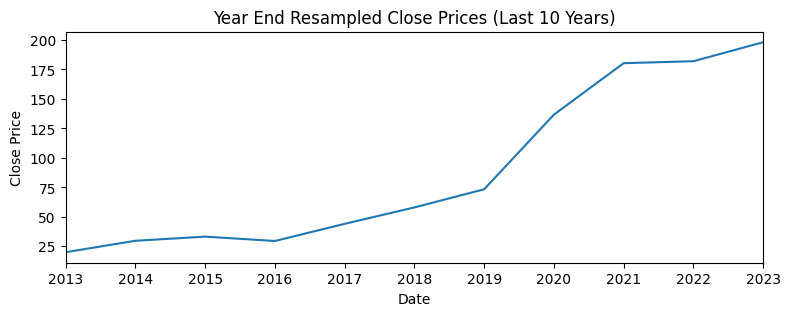

In [ ]:
df_last_10_years = df_apple[df_apple.index >= pd.to_datetime('2023-12-31') - pd.DateOffset(years=10)]

df_apple_resampled = df_last_10_years.resample(rule='A').max()['Close']

# Plotting the resampled data
plt.figure(figsize=(9, 3))
df_apple_resampled.plot()

# Get the unique years in the resampled data
unique_years = df_apple_resampled.index.year.unique()

# Set ticks to include all years
plt.xticks(df_apple_resampled.index, labels=unique_years)

plt.title('Year End Resampled Close Prices (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

**Business Year End Resampling**

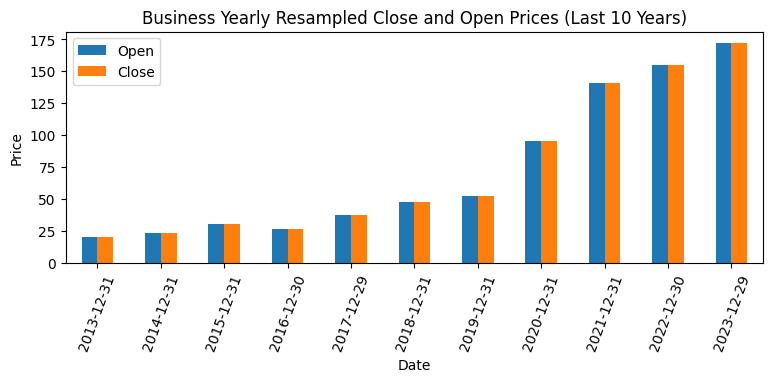

In [ ]:
df_last_10_years = df_apple[df_apple.index >= pd.to_datetime('2023-12-31') - pd.DateOffset(years=10)]
# df_resampled_data = df_last_10_years['Close'].resample(rule='BA').mean() #.plot(kind='bar')
df_resampled_data = df_last_10_years[['Open','Close']].resample(rule='BA').mean()


# Convert index to date without time
df_resampled_data.index = df_resampled_data.index.date

df_resampled_data.plot(kind='bar', width= 0.5, figsize=(9, 3))
plt.xticks(rotation=70)

plt.title('Business Yearly Resampled Close and Open Prices (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

**Monthly Resampling for last 5 years**

<Figure size 900x300 with 0 Axes>

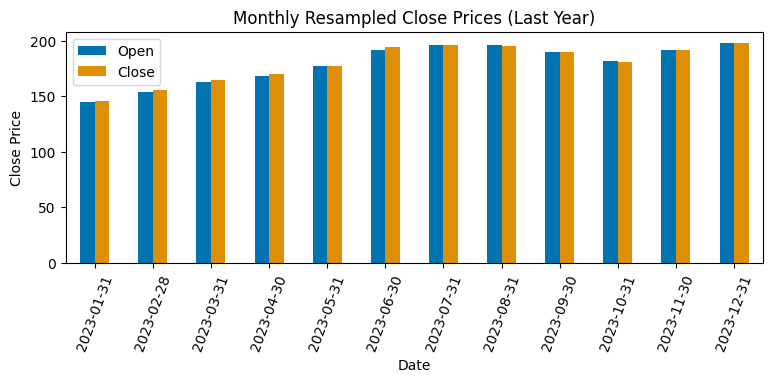

In [ ]:
df_last_years = df_apple[df_apple.index >= pd.to_datetime('2023-12-31') - pd.DateOffset(years=1)]
df_resampled_data = df_last_years[['Open','Close']].resample(rule='M').max() #.plot(kind='bar')

# Convert index to date without time
df_resampled_data.index = df_resampled_data.index.date

# Set a color palette designed for accessibility
colors = sns.color_palette("colorblind")

plt.figure(figsize=(9, 3))
df_resampled_data.plot(kind = 'bar',width= 0.5, figsize=(9, 3), color= colors)
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=70)

plt.title('Monthly Resampled Close Prices (Last Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

**Models**

In [ ]:
pip install pandas numpy scikit-learn tensorflow statsmodels

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

**Data Preprocessing**

In [ ]:
# check null values
print(df_apple.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
#datatype info
print(df_apple.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10851 entries, 1980-12-15 to 2023-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10851 non-null  float64
 1   High       10851 non-null  float64
 2   Low        10851 non-null  float64
 3   Close      10851 non-null  float64
 4   Adj Close  10851 non-null  float64
 5   Volume     10851 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 593.4 KB
None


**Feature** **Engineering**

In [ ]:
# Feature Engineering
df_apple['Year'] = df_apple.index.year
df_apple['Month'] = df_apple.index.month
df_apple['Day'] = df_apple.index.day
df_apple['DayOfWeek'] = df_apple.index.dayofweek

In [ ]:

# Feature selection
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek']
X = df_apple[features]
y = df_apple['Close']


**Train Test Split**

In [ ]:
split_date = '2022-01-01'

# Split the data into training and testing sets
train_data = df_apple[df_apple.index < split_date]
test_data = df_apple[df_apple.index >= split_date]

# Extract features and target variable for training and testing sets
X_train, y_train = train_data[features], train_data['Close']
X_test, y_test = test_data[features], test_data['Close']


In [ ]:
# Standardize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape input to be 3D [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


**LSTM**

In [ ]:
# Custom wrapper for Keras model
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, units=50, optimizer='adam'):
        self.units = units
        self.optimizer = optimizer
        self.model = None

    def build_fn(self):
        model = Sequential()
        model.add(LSTM(self.units, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
        model.add(Dense(1))
        model.compile(optimizer=self.optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=50, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)



**Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning
param_dist = {
    'units': [50, 100, 150],
    'optimizer': ['adam', 'rmsprop', 'sgd', 'adagrad'],
}

lstm_model = KerasRegressorWrapper()

# Perform Randomize search CV
random_search = RandomizedSearchCV(estimator=lstm_model, param_distributions=param_dist, cv=3, n_iter=5, n_jobs=-1, verbose=2)
random_search_result = random_search.fit(X_train_lstm, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", random_search_result.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'units': 50, 'optimizer': 'adam'}


**Train Model**

In [ ]:
# Train the final model with the best hyperparameters
best_lstm_model = KerasRegressorWrapper(units=random_search_result.best_params_['units'],
                                        optimizer=random_search_result.best_params_['optimizer'])
best_lstm_model.fit(X_train_lstm, y_train)

KerasRegressorWrapper()

**Evaluate Model**

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


lstm_Predictions = best_lstm_model.predict(X_test_lstm)

rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_Predictions))
mae_lstm = mean_absolute_error(y_test, lstm_Predictions)
r2_lstm = r2_score(y_test, lstm_Predictions)
mse_lstm = mean_squared_error(y_test, lstm_Predictions)

print(f'LSTM Model (RMSE): {rmse_lstm}')
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'R-squared (R2) Score: {r2_lstm}')
print(f'Mean Squared Error: {mse_lstm}')

16/16 [==============================] - 0s 2ms/step
LSTM Model (RMSE): 2.3105020526955355
Mean Absolute Error (MAE): 1.597904406966797
R-squared (R2) Score: 0.9828763520127435
Mean Squared Error: 5.338419735510284


In [ ]:
# Predict the closing price for the next day
next_day_pred = best_lstm_model.predict(X_test_lstm[-1].reshape(1, 1, X_test_lstm[-1].shape[1]))[0][0]

# Print the predicted price for the next day
print("\nPredicted Closing Price for the Next Day:", next_day_pred)


1/1 [==============================] - 0s 20ms/step

Predicted Closing Price for the Next Day: 193.0447


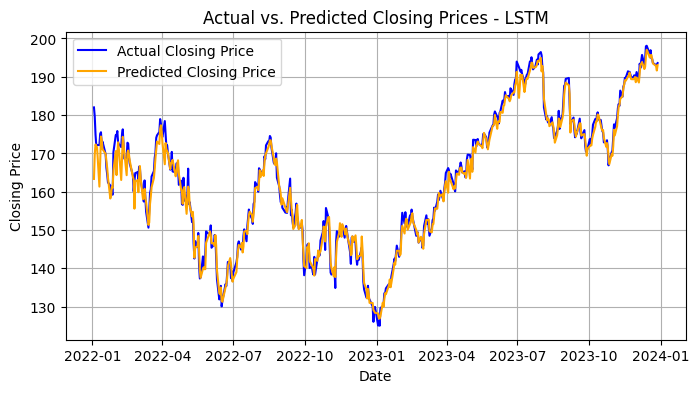

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted stock prices
plt.figure(figsize=(8, 4))
plt.plot(test_data.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(test_data.index, lstm_Predictions, label='Predicted Closing Price', color='orange')
plt.title('Actual vs. Predicted Closing Prices - LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go

# Filter actual closing prices from January 2023 onwards
actual_prices_from_january_2023 = y_test[y_test.index >= '2023-01-01']

# Predict the closing price for the next day
next_day_pred = best_lstm_model.predict(X_test_lstm[-1].reshape(1, 1, X_test_lstm[-1].shape[1]))[0][0]

# Create traces for actual and predicted prices
actual_trace = go.Scatter(x=actual_prices_from_january_2023.index, y=actual_prices_from_january_2023.values,
                         mode='lines+markers', name='Actual Closing Prices', line=dict(color='blue'))
predicted_trace = go.Scatter(x=[actual_prices_from_january_2023.index[-1], actual_prices_from_january_2023.index[-1] + pd.DateOffset(days=1)],
                             y=[actual_prices_from_january_2023.values[-1], next_day_pred],
                             mode='lines+markers', name='Predicted Price (Next Day)', line=dict(color='brown'))

# Create layout
layout = go.Layout(title='Actual and Predicted Closing Prices for the Next Day (Starting from January 2023)',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Closing Price'))

# Create figure and add traces
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

fig.update_layout(height=400, width=900)  # Adjust height and width as needed

# Show interactive plot
fig.show()


1/1 [==============================] - 0s 21ms/step


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)

# Predict using the trained model on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)

Print Last day's actual Closing Price and Next day's predicted Closing price

In [ ]:
# Get the index of the last row in the test set
last_index = len(X_test) - 1

# Extract the features for the next day
features_next_day = X_test.iloc[last_index]

# Reshape for scikit-learn)
features_next_day_reshaped = features_next_day.values.reshape(1, -1)

# Predict the closing price for the next day
predicted_closing_price = linear_reg_model.predict(features_next_day_reshaped)[0]

# Print the predicted closing price for the next day
print(f"Predicted closing price for the next day: {predicted_closing_price}")


Predicted closing price for the next day: 193.7261409745836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Evaluate Model's Performance

In [ ]:
# Evaluate the performance
rmse_linear_reg = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
mae_linear_reg = mean_absolute_error(y_test, linear_reg_predictions)
mse_linear_reg = mean_squared_error(y_test, linear_reg_predictions)
r2_linear_reg = r2_score(y_test, linear_reg_predictions)

# Print performance metrics
print(f'Linear Regression Model RMSE: {rmse_linear_reg}')
print(f'Linear Regression Model MAE: {mae_linear_reg}')
print(f'Linear Regression Model MSE: {mse_linear_reg}')
print(f'Linear Regression Model R-squared: {r2_linear_reg}')

Linear Regression Model RMSE: 1.001277543207529
Linear Regression Model MAE: 0.7933443775323116
Linear Regression Model MSE: 1.002556718531705
Linear Regression Model R-squared: 0.9967841741215662


**Visualize results**

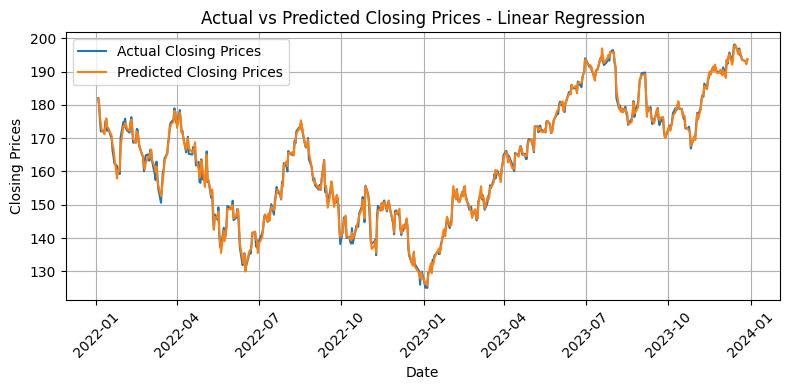

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted closing prices
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test, label='Actual Closing Prices')
plt.plot(y_test.index, linear_reg_predictions, label='Predicted Closing Prices')
plt.title('Actual vs Predicted Closing Prices - Linear Regression')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True)
plt.show()


**SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np

# pipeline with SVR and MinMaxScaler
svr_pipeline = make_pipeline(MinMaxScaler(), SVR())

#parameter grid for grid search
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [0.01, 0.1, 1],
    'svr__kernel': ['linear', 'rbf']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
# Train model
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Best model
best_svr_model = grid_search.best_estimator_

# Make predictions on the test set
svr_predictions = best_svr_model.predict(X_test)

Best Parameters: {'svr__C': 10, 'svr__gamma': 0.01, 'svr__kernel': 'linear'}


In [ ]:
# Evaluate performance metrics
mse_svr = mean_squared_error(y_test, svr_predictions)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_predictions))
r2_svr = r2_score(y_test, svr_predictions)
mae_svr = mean_absolute_error(y_test, svr_predictions)

print("Mean Squared Error (SVR):", mse_svr)
print("Mean Absolute Error (SVR):", mae_svr)
print("Root Mean Squared Errorr (SVR):", rmse_svr)
print("R-squared (R2) Scor (SVR):", r2_svr)

Mean Squared Error (SVR): 2.452159917573405
Root Mean Squared Errorr (SVR): 1.5659373926097444
R-squared (R2) Scor (SVR): 0.9921343908277431


In [ ]:
next_day_features = X_test.iloc[0].values.reshape(1, -1)

# Make prediction for the next day closing price
next_day_closing_price = best_svr_model.predict(next_day_features)

# Print the predicted next day closing price
print("Predicted Next Day Closing Price:", next_day_closing_price[0])

Predicted Next Day Closing Price: 179.81168263996872


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



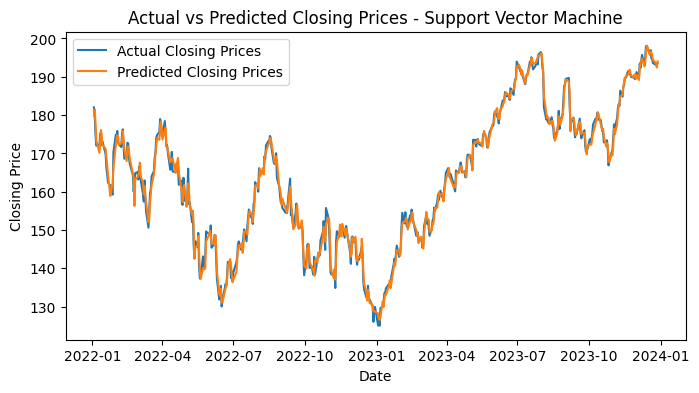

In [ ]:
# Plotting Actual vs Predicted closing prices
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test.values, label='Actual Closing Prices')
plt.plot(y_test.index, svr_predictions, label='Predicted Closing Prices')

plt.title('Actual vs Predicted Closing Prices - Support Vector Machine')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



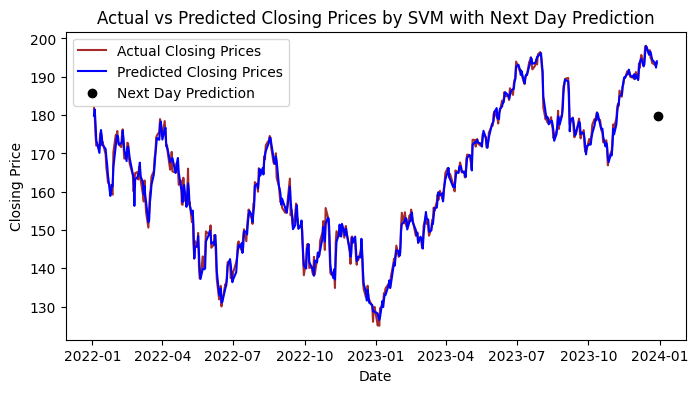

In [ ]:
X_test_next = X_test.iloc[0].values.reshape(1, -1)
next_day_prediction = best_svr_model.predict(X_test_next)

# Plotting Actual vs Predicted closing prices
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test.values, label='Actual Closing Prices', color='brown')
plt.plot(y_test.index, svr_predictions, label='Predicted Closing Prices', color='blue')

# Plotting the next day predicted closing price
next_day_index = y_test.index[-1] + pd.DateOffset(1)
plt.scatter(next_day_index, next_day_prediction, color='black', label='Next Day Prediction')

plt.title('Actual vs Predicted Closing Prices by SVM with Next Day Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

plt.show()


**GRU**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale features
train_features_scaled = scaler.fit_transform(X_train)
test_features_scaled = scaler.transform(X_test)

# Convert y_train and y_test to NumPy arrays and then reshape
train_target_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
test_target_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape data for GRU (samples, time steps, features)
def create_dataset(features, target, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(features) - time_steps):
        a = features[i:(i + time_steps), :]
        dataX.append(a)
        dataY.append(target[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

time_steps = 10  # You can adjust this based on your preferences
X_train_gru, y_train_gru = create_dataset(train_features_scaled, train_target_scaled, time_steps)
X_test_gru, y_test_gru = create_dataset(test_features_scaled, test_target_scaled, time_steps)

# Build the GRU model
GRU_model = Sequential()
GRU_model.add(GRU(units=50, activation='relu', input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
GRU_model.add(Dense(units=1))
GRU_model.compile(optimizer='adam', loss='mse')

# Train the model
GRU_model.fit(X_train_gru, y_train_gru, epochs=50, batch_size=32)

# Make predictions on the test set
gru_predictions_scaled = GRU_model.predict(X_test_gru)
gru_predictions = scaler.inverse_transform(gru_predictions_scaled)

# Invert scaling for the test set
y_test_actual = scaler.inverse_transform(y_test_gru.reshape(-1, 1))



Epoch 1/50
324/324 [==============================] - 4s 7ms/step - loss: 0.0011
Epoch 2/50
324/324 [==============================] - 2s 7ms/step - loss: 4.6317e-05
Epoch 3/50
324/324 [==============================] - 2s 7ms/step - loss: 3.4368e-05
Epoch 4/50
324/324 [==============================] - 2s 7ms/step - loss: 3.1847e-05
Epoch 5/50
324/324 [==============================] - 3s 9ms/step - loss: 3.4892e-05
Epoch 6/50
324/324 [==============================] - 3s 8ms/step - loss: 3.2319e-05
Epoch 7/50
324/324 [==============================] - 2s 7ms/step - loss: 2.9370e-05
Epoch 8/50
324/324 [==============================] - 2s 6ms/step - loss: 2.5912e-05
Epoch 9/50
324/324 [==============================] - 2s 7ms/step - loss: 2.3507e-05
Epoch 10/50
324/324 [==============================] - 2s 7ms/step - loss: 2.7545e-05
Epoch 11/50
324/324 [==============================] - 3s 9ms/step - loss: 2.5544e-05
Epoch 12/50
324/324 [==============================] - 3s 9ms/step 

In [ ]:
# Evaluate performance metrics
mae_gru = mean_absolute_error(y_test_actual, gru_predictions)
mse_gru = mean_squared_error(y_test_actual, gru_predictions)
rmse_gru = np.sqrt(mean_squared_error(y_test_actual,gru_predictions))
r2_gru = r2_score(y_test_actual,gru_predictions)

print("Mean Absolute Error (GRU):", mae_gru)
print("Mean Squared Error (GRU):", mse_gru)
print("Root Mean Squared Error(GRU)", rmse_gru)
print("R-squared(GRU)", r2_gru)

Mean Absolute Error (GRU): 3.040559805933115
Mean Squared Error (GRU): 14.515240216712192
Root Mean Squared Error(GRU) 3.809887165876726
R-squared(GRU) 0.9539570866153857


1/1 [==============================] - 0s 21ms/step
Next Day's Predicted Closing Price: 195.5054025456072


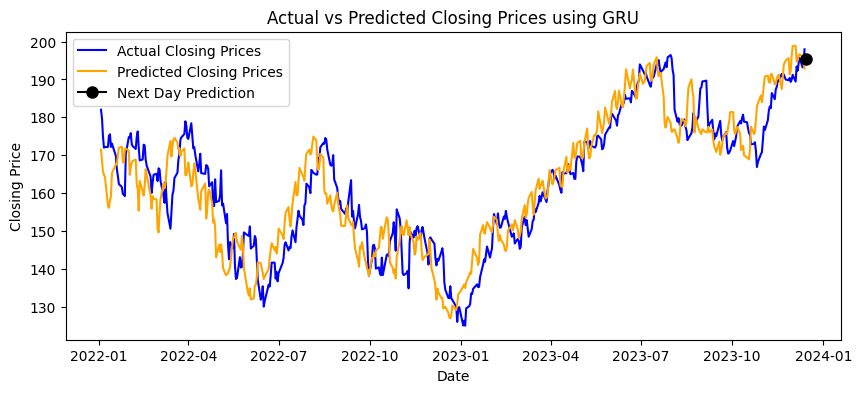

In [ ]:
plt.figure(figsize=(10, 4))

# Plotting actual closing prices
plt.plot(y_test.index[:len(gru_predictions)], y_test.values[:len(gru_predictions)], label='Actual Closing Prices', color='blue')

# Plotting predicted closing prices
plt.plot(y_test.index[:len(gru_predictions)], gru_predictions.flatten(), label='Predicted Closing Prices', color='orange')

# Plotting next day's predicted closing price
next_day_index = y_test.index[len(gru_predictions)]
next_day_features_scaled = np.array([test_features_scaled[-time_steps:]])
next_day_prediction_scaled = GRU_model.predict(next_day_features_scaled)[0][0]

# Inverse scale the next day's prediction
next_day_prediction = scaler.inverse_transform([[next_day_prediction_scaled]])[0][0]

plt.plot(next_day_index, next_day_prediction, marker='o', markersize=8, color='black', label='Next Day Prediction')

# Print the next day's predicted closing price
print("Next Day's Predicted Closing Price:", next_day_prediction)

plt.title('Actual vs Predicted Closing Prices using GRU')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = decision_tree_model.predict(X_test)

In [ ]:
# Calculate RMSE for Decision Tree model
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
r2_dt = r2_score(y_test, dt_predictions)

print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Decision Tree MAE: {dt_mae}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Decision Tree R2 Score: {r2_dt}')

Decision Tree RMSE: 5.105137426188596
Decision Tree MAE: 3.1393825746052273
Decision Tree MSE: 26.06242814027152
Decision Tree R2 Score: 0.916401506948101


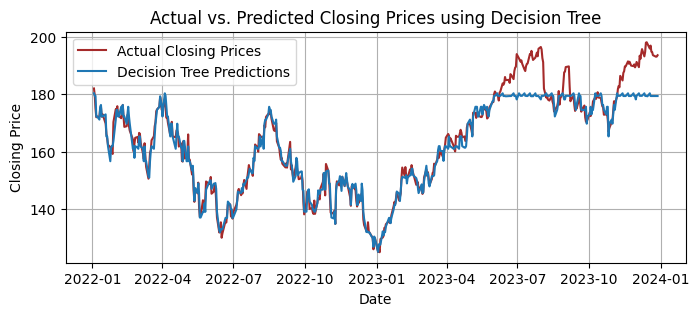

In [ ]:
# Plotting actual vs predicted closing prices for Decision Tree
plt.figure(figsize=(8, 3))
plt.plot(y_test.index, y_test, label='Actual Closing Prices', color='brown')
plt.plot(y_test.index, dt_predictions, label='Decision Tree Predictions')

plt.title('Actual vs. Predicted Closing Prices using Decision Tree')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

**Hyperparameters for DT**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
# Define the hyperparameters and their possible values to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define a scoring function (neg_mean_squared_error) for GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create GridSearchCV object
grid_search = GridSearchCV(decision_tree_model, param_grid, scoring=scorer, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Train a new Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
# Make predictions on the test set
dt_predictions = best_dt_model.predict(X_test)

In [ ]:
# Calculate RMSE for Decision Tree model
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
r2_dt = r2_score(y_test, dt_predictions)

print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Decision Tree MAE: {dt_mae}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Decision Tree R2 Score: {r2_dt}')

Decision Tree RMSE: 5.105137426188596
Decision Tree MAE: 3.1393825746052273
Decision Tree MSE: 26.06242814027152
Decision Tree R2 Score: 0.916401506948101


**Ensemble**

In [ ]:
import numpy as np
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [ ]:
# Train additional models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Generate predictions from additional models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

lstm_Predictions = np.squeeze(lstm_Predictions)
gru_predictions = np.squeeze(gru_predictions)

# Combine predictions using a simple average
# ensemble_predictions = np.mean([linear_reg_predictions, lstm_Predictions, dt_predictions, svr_predictions, rf_predictions, xgb_predictions], axis=0)
ensemble_predictions = np.mean([linear_reg_predictions, lstm_Predictions, svr_predictions], axis=0)



In [ ]:

# Calculate RMSE for random forest and xgboost models
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
# Calculate RMSE for ensemble model
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

# Calculate R2 for random forest and xgboost and ensemble models
r2_rf = r2_score(y_test, rf_predictions)
r2_xgboost =  r2_score(y_test, xgb_predictions)
r2_ensemble =  r2_score(y_test, ensemble_predictions)

# Calculate MSE for random forest and xgboost and ensemble models
mse_rf = mean_squared_error(y_test, rf_predictions)
mse_xgboost =  mean_squared_error(y_test, xgb_predictions)
mse_ensemble =  mean_squared_error(y_test, ensemble_predictions)

print(f'Linear Regression RMSE: {rmse_linear_reg}')
print(f'LSTM RMSE: {rmse_lstm}')
print(f'SVR RMSE: {rmse_svr}')
print(f'Random Forest RMSE: {rf_rmse}')
print(f'XGBoost RMSE: {xgb_rmse}')
print(f'Ensemble Model RMSE: {ensemble_rmse}')

Linear Regression RMSE: 1.001277543207529
LSTM RMSE: 2.3105020526955355
SVR RMSE: 1.5659373926097444
Random Forest RMSE: 5.484677544438199
XGBoost RMSE: 16.45651669804165
Ensemble Model RMSE: 1.4431949983889538


**Actual VS Model's Predicted**

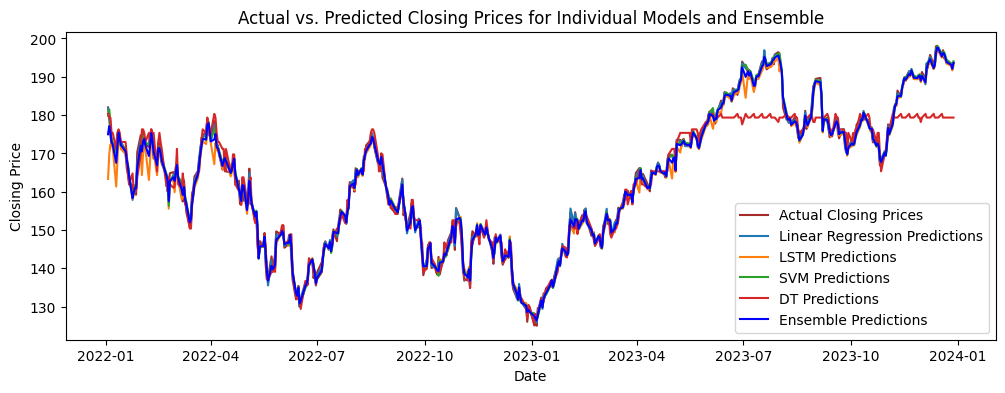

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted closing prices for all models
plt.figure(figsize=(12, 4))

# Actual closing prices
plt.plot(y_test.index, y_test, label='Actual Closing Prices', color='brown')

# Predictions from individual models
plt.plot(y_test.index, linear_reg_predictions, label='Linear Regression Predictions')
plt.plot(y_test.index, lstm_Predictions, label='LSTM Predictions')
plt.plot(y_test.index, svr_predictions, label='SVM Predictions')
plt.plot(y_test.index, dt_predictions, label='DT Predictions')

# Ensemble predictions
plt.plot(y_test.index, ensemble_predictions, label='Ensemble Predictions', color='blue')

plt.title('Actual vs. Predicted Closing Prices for Individual Models and Ensemble')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**RMSE Comparison**

<ipython-input-106-5b5ecef31241>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




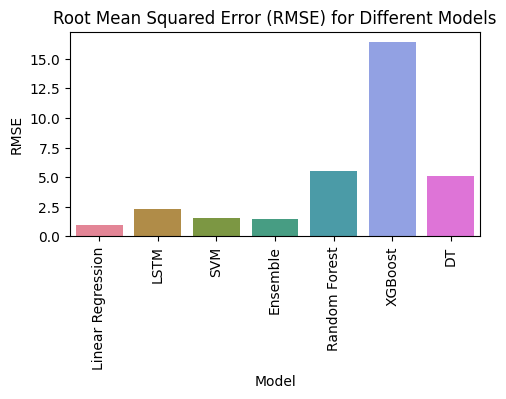

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the RMSE data
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM', 'SVM', 'Ensemble', 'Random Forest', 'XGBoost', 'DT'],
    'RMSE': [rmse_linear_reg, rmse_lstm, rmse_svr, ensemble_rmse, rf_rmse, xgb_rmse, dt_rmse]
})

# Define a color palette for models
palette = sns.color_palette("husl", n_colors=len(rmse_df))

# Create a bar plot for RMSE
plt.figure(figsize=(5, 3))
sns.barplot(data=rmse_df, x='Model', y='RMSE', palette=palette, saturation=0.7, capsize=0.1)

plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


<ipython-input-117-39d41f0c97a0>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




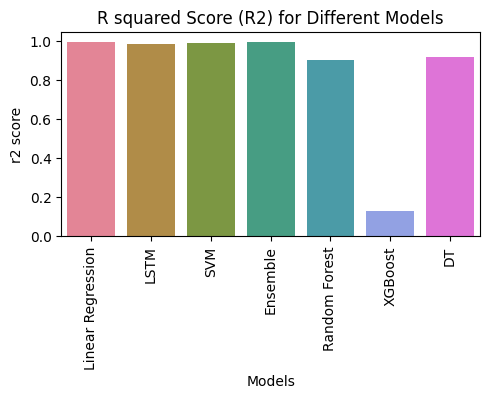

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the R2 Score data
R2Score_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM', 'SVM', 'Ensemble', 'Random Forest', 'XGBoost', 'DT'],
    'r2 score': [r2_linear_reg, r2_lstm, r2_svr, r2_ensemble, r2_rf, r2_xgboost, r2_dt]
})

# Define a color palette for models
palette = sns.color_palette("husl", n_colors=len(R2Score_df))

# Create a bar plot for RMSE
plt.figure(figsize=(5, 3))
sns.barplot(data=R2Score_df, x='Model', y='r2 score', palette=palette, saturation=0.7, capsize=0.1)

plt.title('R squared Score (R2) for Different Models')
plt.xlabel('Models')
plt.ylabel('r2 score')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


<ipython-input-123-615b7a88abd2>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




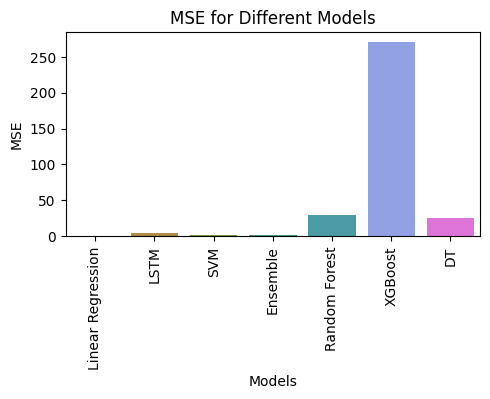

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the R2 Score data
MSE_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM', 'SVM', 'Ensemble', 'Random Forest', 'XGBoost', 'DT'],
    'MSE': [mse_linear_reg, mse_lstm, mse_svr, mse_ensemble, mse_rf, mse_xgboost, dt_mse]
})

# Define a color palette for models
palette = sns.color_palette("husl", n_colors=len(R2Score_df))

# Create a bar plot for MSE
plt.figure(figsize=(5, 3))
sns.barplot(data=MSE_df, x='Model', y='MSE', palette=palette, saturation=0.7, capsize=0.1)

plt.title('MSE for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


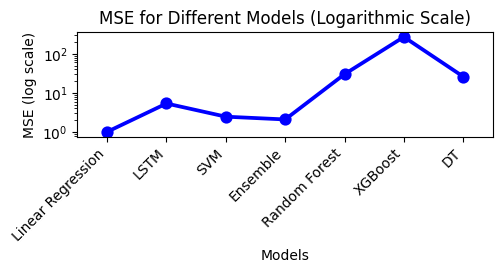

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the MSE data
MSE_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM', 'SVM', 'Ensemble', 'Random Forest', 'XGBoost', 'DT'],
    'MSE': [mse_linear_reg, mse_lstm, mse_svr, mse_ensemble, mse_rf, mse_xgboost, dt_mse]
})

# Define a color palette for models
palette = sns.color_palette("husl", n_colors=len(MSE_df))

# Create a point plot for MSE
plt.figure(figsize=(5, 2))
sns.pointplot(data=MSE_df, x='Model', y='MSE', color='blue', markers='o', linestyles='-', capsize=0.1)
plt.yscale("log")  # Set y-axis to logarithmic scale

plt.title('MSE for Different Models (Logarithmic Scale)')
plt.xlabel('Models')
plt.ylabel('MSE (log scale)')
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()
